In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('1.csv')

In [80]:
df=df.drop(' 4 for malignant)',axis=1)

In [81]:
df =df.replace(to_replace='?',value=np.nan)
df = df.fillna(0)

In [82]:
df['Bare Nuclei']=pd.to_numeric(df['Bare Nuclei'])
df.rename(columns={'Class: (2 for benign,  4 for malignant)': 'Class'}, inplace=True)

In [84]:
y=df.Class
X=df.drop('Class',axis=1)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
impo=clf.feature_importances_

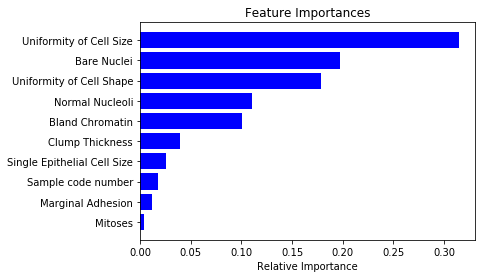

In [88]:
features = X.columns
importances = impo
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [89]:
X=X.drop(['Sample code number','Mitoses'],axis=1)

In [67]:
X.to_csv('X.csv',index=False)
y.to_csv('y.csv',index=False,header=['Class'])

In [68]:
X.shape

(699, 8)

In [69]:
y.shape

(699,)

In [73]:
plt.show()

In [92]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


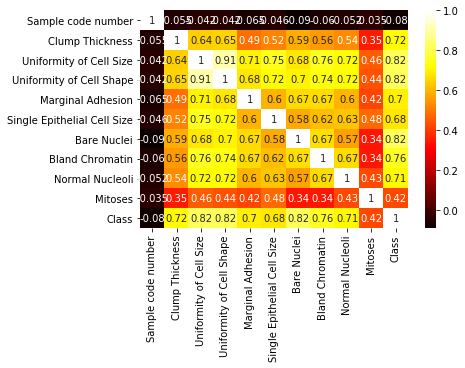

In [91]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.show()